**Voice Gender Classifier**

 **Goal:** Build a model to predict the speaker’s gender (male/female) using acoustic voice
 features.

**Install Required Libraries**

In [4]:
import kagglehub
primaryobjects_voicegender_path = kagglehub.dataset_download('primaryobjects/voicegender')

print('Data source import complete.')

Data source import complete.


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/voicegender/voice.csv
/kaggle/input/voicegender/.nfs000000002d3bedca000000df


In [9]:
!pip install pandas scikit-learn seaborn matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

**Load the Voice Gender Dataset**

In [28]:
# Loading the CSV file into a DataFrame
df = pd.read_csv('/kaggle/input/voicegender/voice.csv')

# Preview data
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Preprocess Data**

In [29]:
# Convert label to lowercase and filter valid entries
df['label'] = df['label'].str.lower()
df = df[df['label'].isin(['male', 'female'])]

# Encode labels
df['label'] = df['label'].map({'male': 0, 'female': 1})

# Drop rows with any missing values
df = df.dropna()

# Split features and target
X = df.drop('label', axis=1)
y = df['label']

**Split into Train and Test Sets**

In [30]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42
)

**Train a Random Forest Classifier**

In [31]:
# Train a Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Evaluate the Model**

Accuracy: 0.9842271293375394

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       337
           1       0.97      0.99      0.98       297

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



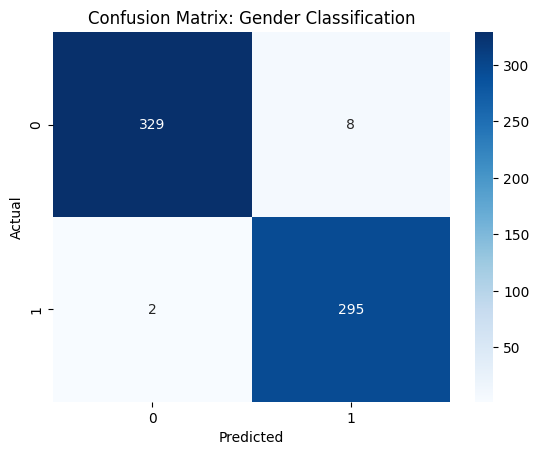

In [34]:
# Predict on test data
y_pred = model.predict(X_test)
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
# Detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Gender Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Feature Importance Plot**

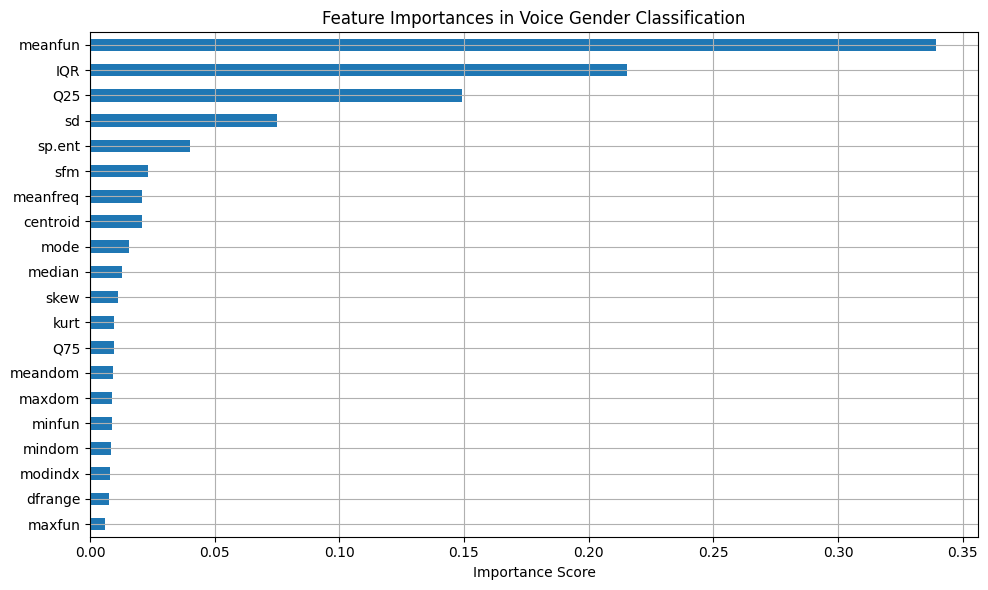

In [36]:
# Show important acoustic features
importances = model.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=True)
# Plot top features
plt.figure(figsize=(10, 6))
feat_imp.plot(kind='barh')
plt.title("Feature Importances in Voice Gender Classification")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()

### **📘 Summary**
This project uses a Random Forest Classifier to predict a speaker's gender (male or female) based on acoustic voice features from the UCI Voice Gender Dataset.

**🛠️ Steps:**
*   📥 Loaded and preprocessed the dataset
*   🔢 Encoded labels (male=0, female=1)
*   ✂️ Split data into training and testing sets
*   🌲 Trained a Random Forest model
*   📊 Evaluated performance using accuracy 98%, classification report, and confusion matrix
*   🌟 Visualized the most important voice features affecting prediction
